In [ ]:
import matplotlib.pyplot as plt
import mikeio

In [ ]:
_fn = '../tests/testdata/oresundHD_run1.dfsu'
ds = mikeio.read(_fn)
ds

<mikeio.Dataset>
dims: (time:5, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (5 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: Total water depth <Water Depth> (meter)
 2: U velocity <u velocity component> (meter per sec)
 3: V velocity <v velocity component> (meter per sec)

In [ ]:
da = ds["Surface elevation"]
da

<mikeio.DataArray>
name: Surface elevation
dims: (time:5, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (5 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)

In [ ]:
# default plot is a map, for multiple timestep data, the first timestep will be shown 
da.plot();

In [ ]:
# plot last time step as contour map
da[-1].plot.contour(figsize=(5,8));

In [ ]:
_, ax = plt.subplots(1,2)
da.plot.mesh(ax=ax[0])
da.plot.outline(ax=ax[1]);

In [ ]:
da.max().plot(title="Max");

In [ ]:
# difference between last and first timestep
(da[0] - da[-1]).plot.contourf(title="Difference");

In [ ]:
da.mean(axis="space").plot(title="Spatial mean as function of time");

In [ ]:
# plot all data as histogram
da.plot.hist(bins=100);

In [ ]:
# plot all points as timeseries
da.plot.line(alpha=0.01);

In [ ]:
_fn = '../tests/testdata/oresund_sigma_z.dfsu'
dfs = mikeio.open(_fn)
dfs

<mikeio.Dfsu3D>number of nodes: 12042
number of elements: 17118
projection: UTM-33
number of sigma layers: 4
max number of z layers: 5
items:
 0: Temperature <Temperature> (degree Celsius)
 1: Salinity <Salinity> (PSU)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)

In [ ]:
ds_1 = dfs.read(layers='top')
ds_1

<mikeio.Dataset>
dims: (time:3, element:3700)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)
geometry: Dfsu2D (3700 elements, 2090 nodes)
items:
 0: Temperature <Temperature> (degree Celsius)
 1: Salinity <Salinity> (PSU)

In [ ]:
ds_1.geometry.is_2d

True

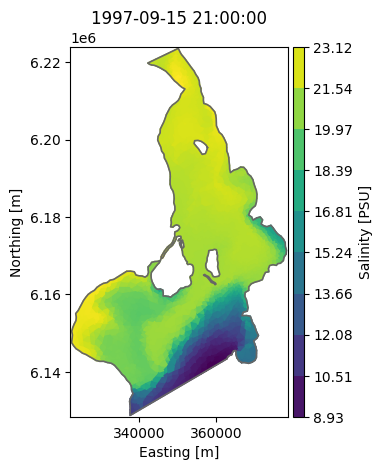

In [ ]:
ds_1[1].plot()

In [ ]:
ds_2 = dfs.read()
ds_2

<mikeio.Dataset>
dims: (time:3, element:17118)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)
geometry: Flexible Mesh Geometry: Dfsu3DSigmaZ
number of nodes: 12042
number of elements: 17118
number of layers: 9
number of sigma layers: 4
projection: UTM-33
items:
 0: Temperature <Temperature> (degree Celsius)
 1: Salinity <Salinity> (PSU)

In [ ]:
ds_2.geometry.is_2d

False

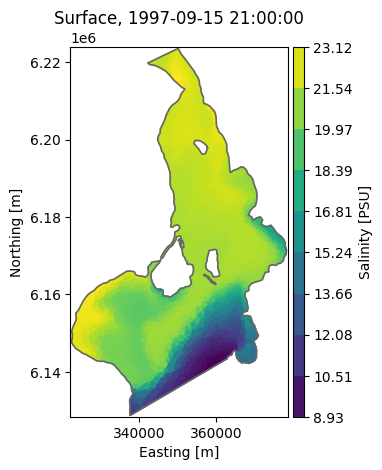

In [ ]:
ds_2[1].plot()

In [ ]:
import marimo as mo

# DataArray - Dfsu plotting

A DataArray with flexible mesh data, can be plotted in many different ways.

## Dfsu 2d

## Plot as map

### Plot aggregated data

## Other plots

* time series
* histogram

## Dfsu 3d

### Read a specific layer
If only a specific layer is read, then all the standard 2d plotting can be used

### Default plotting behaviour for 3d files is to plot surface layer